In [1]:
## allow plots inside notebook
%matplotlib inline

In [2]:
## launch console
# %qtconsole

In [3]:
## setup
import hddm
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\dbang\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [4]:
## PATCH 1: Get around a problem with saving HDDM output in Python 3
def savePatch(self, fname):
    import pickle
    with open(fname, 'wb') as f:
        pickle.dump(self, f)
hddm.HDDM.savePatch = savePatch

In [5]:
## load data
data = hddm.load_csv('hddm_input_scan.csv');

In [7]:
## prepare model
model = hddm.HDDM(data, depends_on={'a': 'condition','v': 'condition','t': 'condition'},include=('sv','st'))

In [8]:
## find MAP starting points
model.find_starting_values()

In [9]:
## create model and start MCMC sampling -- dbname='traces.db', db='pickle'
model.sample(5000, burn=200,dbname='model',db='pickle')

 [-----------------100%-----------------] 5001 of 5000 complete in 12181.1 sec

In [10]:
## save model output
model.savePatch('hddm_fit_scan_output')

In [14]:
## print all stats -- DMAT simulations based on group mean parameters
model.print_stats()

                   mean         std         2.5q          25q        50q        75q     97.5q       mc err
a(1)            2.06548   0.0885328      1.88594      2.00883    2.06591    2.12482   2.23995   0.00175294
a(2)            2.04229   0.0922824      1.86236       1.9801    2.04185    2.10266   2.22366   0.00210831
a(3)             1.9595   0.0864685       1.7894      1.90142    1.96042    2.01901   2.12686   0.00162883
a(4)            1.98426   0.0849229      1.81504      1.92786    1.98463    2.04091   2.14867   0.00154199
a_std          0.495929   0.0349772     0.430676     0.471253    0.49456   0.519576  0.566374  0.000785918
a_subj(1).1      1.4838   0.0834895      1.33271      1.42619    1.48226     1.5377   1.65958    0.0019669
a_subj(1).2     2.82755    0.196959      2.47478      2.69272     2.8157    2.95132   3.25709   0.00512708
a_subj(1).3     2.53765    0.131499      2.28913      2.44743    2.53587    2.62443   2.80574   0.00273306
a_subj(1).4     1.48423   0.0870168  

In [15]:
## print drift rates
stats= model.gen_stats()
stats[stats.index.isin(['v(1)','v(2)','v(3)','v(4)'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v(1),0.758349,0.0788875,0.606805,0.706301,0.75797,0.810151,0.913348,0.00161104
v(2),2.36799,0.0915461,2.18815,2.30813,2.36667,2.4311,2.54882,0.0029829
v(3),0.261985,0.0772553,0.108733,0.210883,0.262025,0.313589,0.415309,0.00126048
v(4),0.94235,0.0785639,0.791363,0.888769,0.941647,0.994436,1.10152,0.0016849


In [16]:
## print thresholds
stats= model.gen_stats()
stats[stats.index.isin(['a(1)','a(2)','a(3)','a(4)'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a(1),2.06548,0.0885328,1.88594,2.00883,2.06591,2.12482,2.23995,0.00175294
a(2),2.04229,0.0922824,1.86236,1.9801,2.04185,2.10266,2.22366,0.00210831
a(3),1.9595,0.0864685,1.7894,1.90142,1.96042,2.01901,2.12686,0.00162883
a(4),1.98426,0.0849229,1.81504,1.92786,1.98463,2.04091,2.14867,0.00154199


In [17]:
## print non-decision times
stats= model.gen_stats()
stats[stats.index.isin(['t(1)','t(2)','t(3)','t(4)'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
t(1),1.50443,0.0180698,1.46894,1.49217,1.50432,1.51679,1.53932,0.000308587
t(2),1.49055,0.0174365,1.45641,1.47881,1.49042,1.50195,1.52503,0.000321111
t(3),1.52844,0.0177215,1.49427,1.51632,1.52832,1.5403,1.56333,0.000361486
t(4),1.52558,0.0172638,1.49148,1.51421,1.52564,1.53713,1.55989,0.000296958


Plotting a(1)
Plotting a(2)
Plotting a(3)
Plotting a(4)
Plotting a_std
Plotting v(1)
Plotting v(2)
Plotting v(3)
Plotting v(4)
Plotting v_std
Plotting t(1)
Plotting t(2)
Plotting t(3)
Plotting t(4)
Plotting t_std
Plotting sv
Plotting st


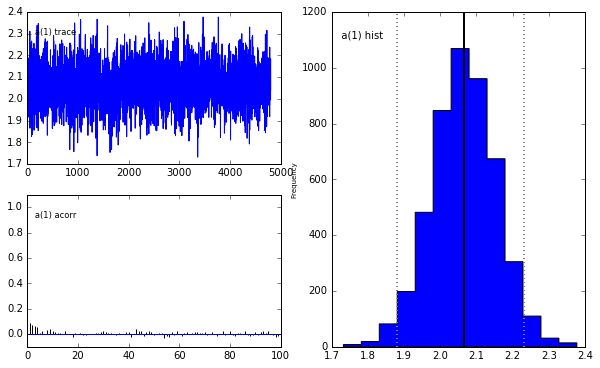

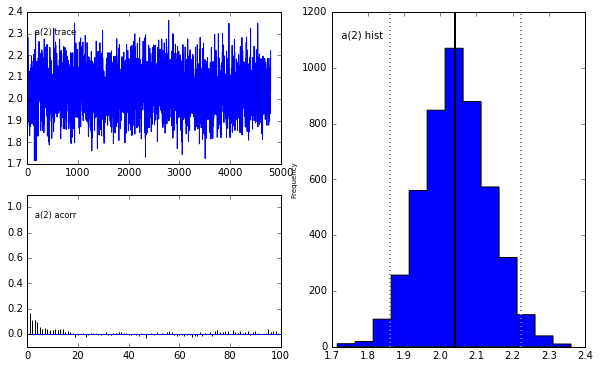

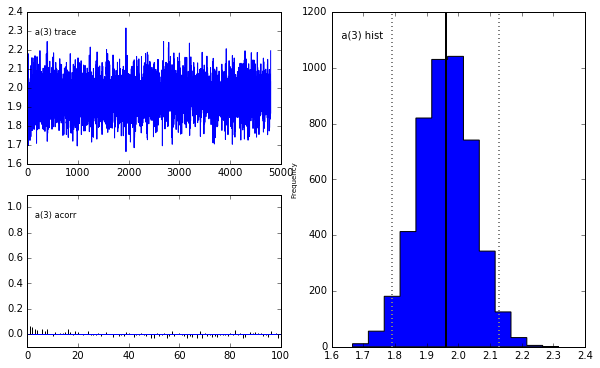

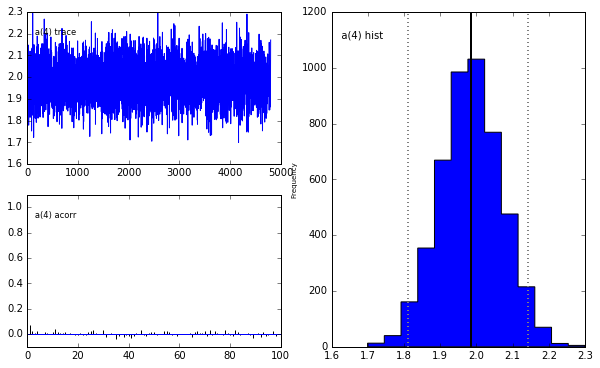

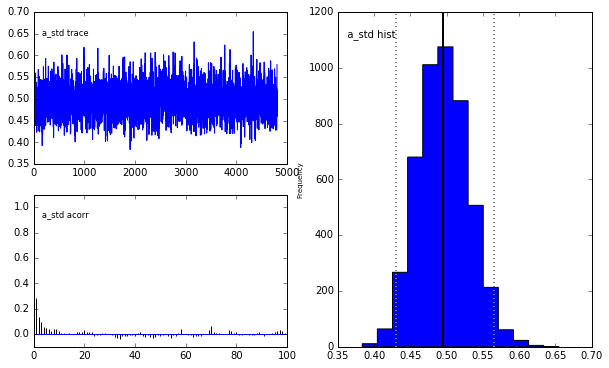

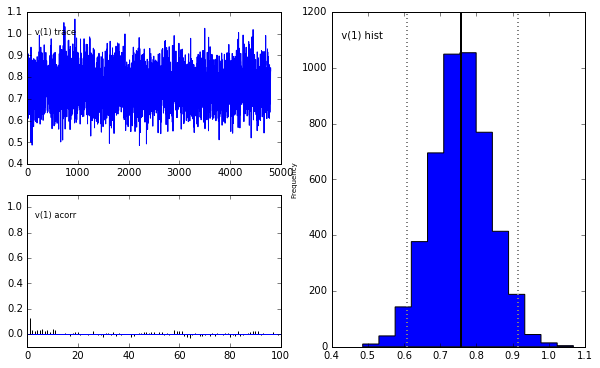

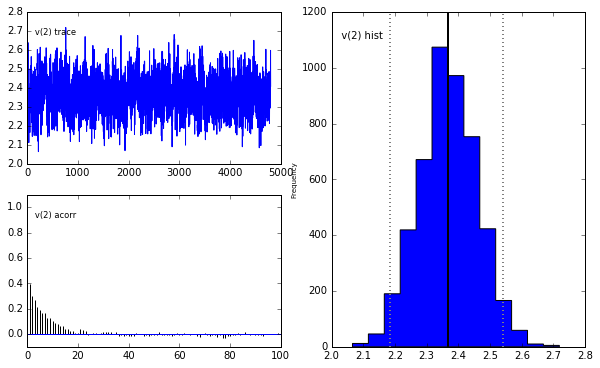

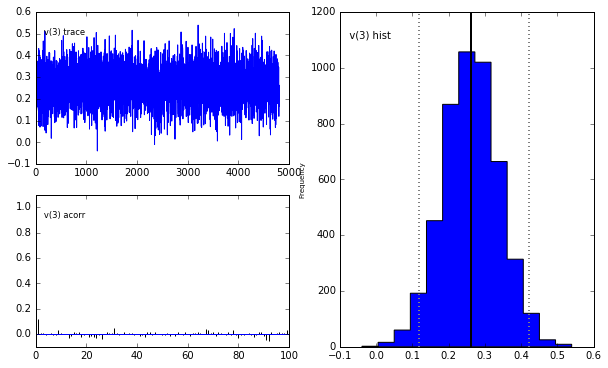

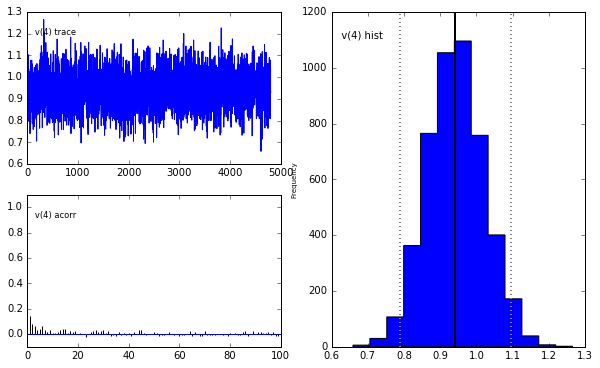

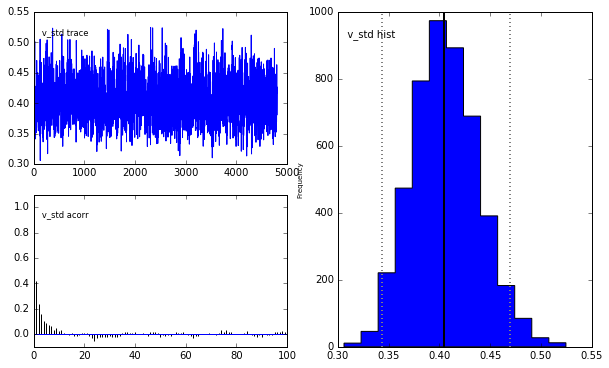

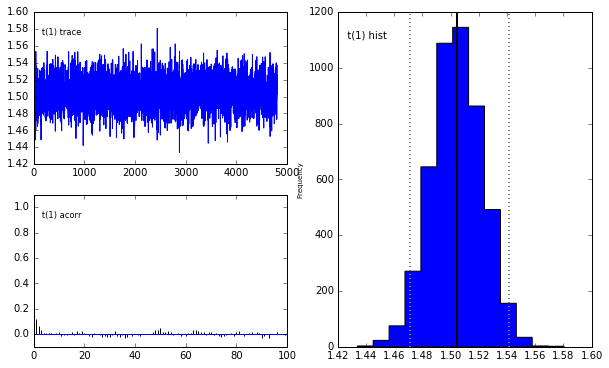

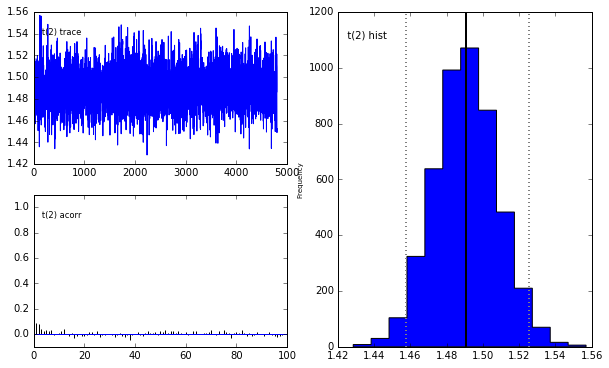

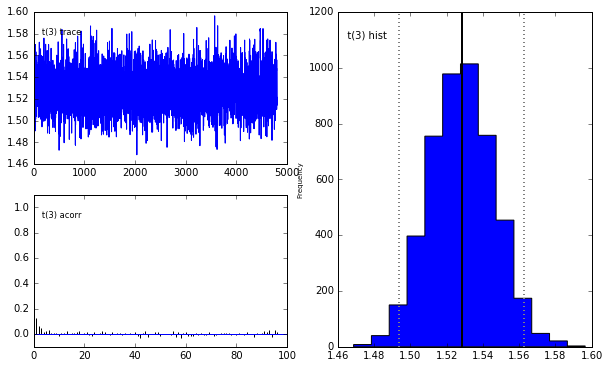

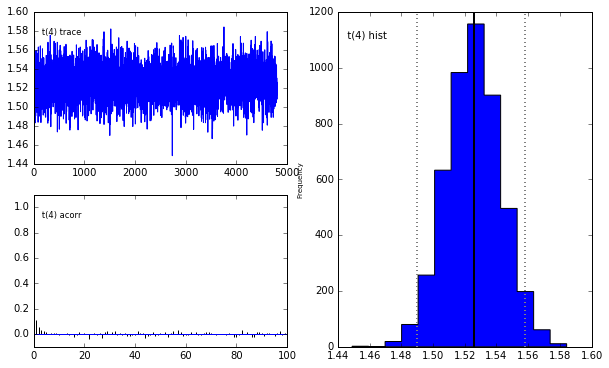

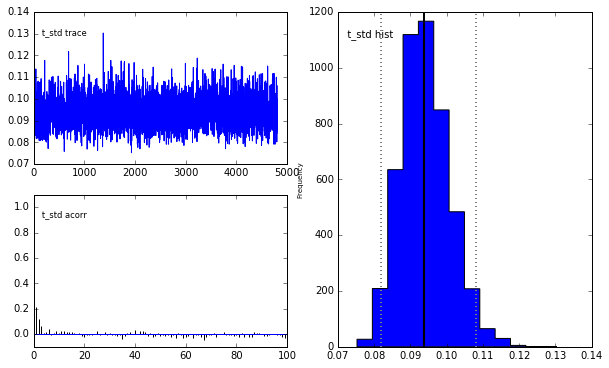

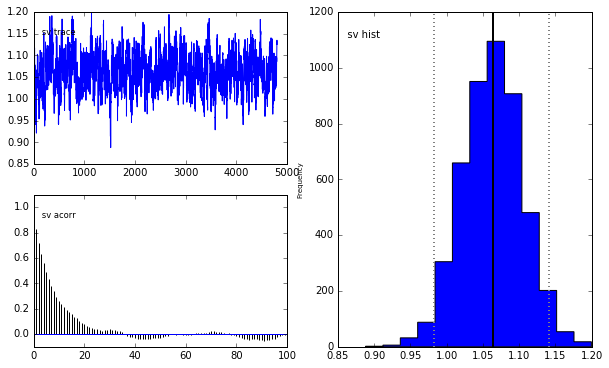

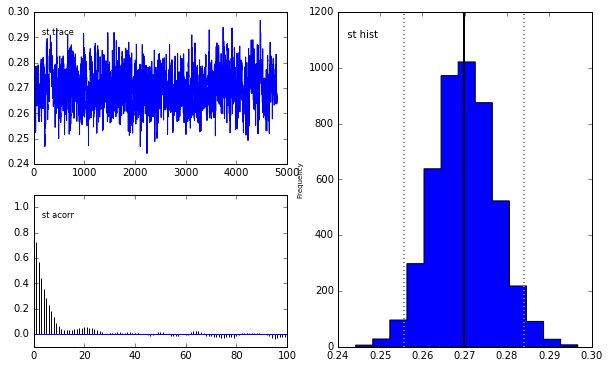

In [18]:
## plot all posteriors and inspect MCMC traces
model.plot_posteriors()

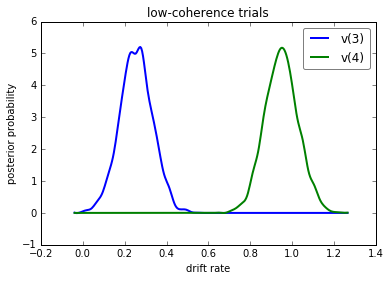

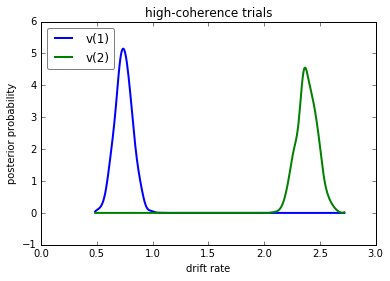

In [19]:
## plot posteriors over drift-rates
HCD1, HCD2, LCD1, LCD2 = model.nodes_db.node[['v(1)', 'v(2)', 'v(3)', 'v(4)']]
hddm.analyze.plot_posterior_nodes([LCD1, LCD2])
plt.xlabel('drift rate')
plt.ylabel('posterior probability')
plt.title('low-coherence trials')
hddm.analyze.plot_posterior_nodes([HCD1, HCD2])
plt.xlabel('drift rate')
plt.ylabel('posterior probability')
plt.title('high-coherence trials')

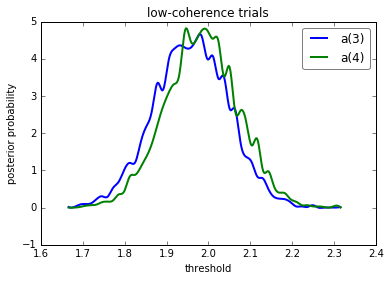

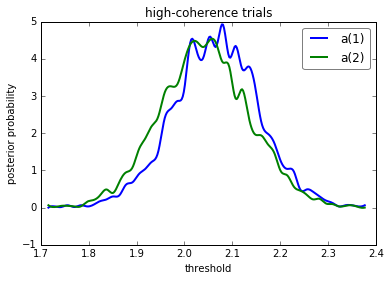

In [20]:
## plot posteriors over thresholds
HCD1, HCD2, LCD1, LCD2 = model.nodes_db.node[['a(1)', 'a(2)', 'a(3)', 'a(4)']]
hddm.analyze.plot_posterior_nodes([LCD1, LCD2])
plt.xlabel('threshold')
plt.ylabel('posterior probability')
plt.title('low-coherence trials')
hddm.analyze.plot_posterior_nodes([HCD1, HCD2])
plt.xlabel('threshold')
plt.ylabel('posterior probability')
plt.title('high-coherence trials')

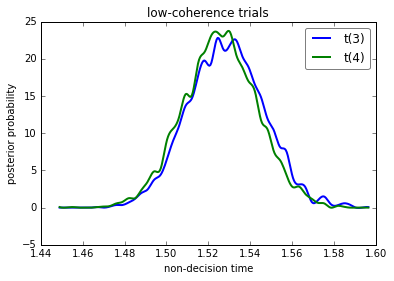

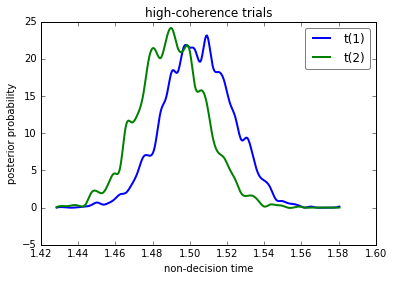

In [21]:
## plot posteriors over non-decision times
HCD1, HCD2, LCD1, LCD2 = model.nodes_db.node[['t(1)', 't(2)', 't(3)', 't(4)']]
hddm.analyze.plot_posterior_nodes([LCD1, LCD2])
plt.xlabel('non-decision time')
plt.ylabel('posterior probability')
plt.title('low-coherence trials')
hddm.analyze.plot_posterior_nodes([HCD1, HCD2])
plt.xlabel('non-decision time')
plt.ylabel('posterior probability')
plt.title('high-coherence trials')

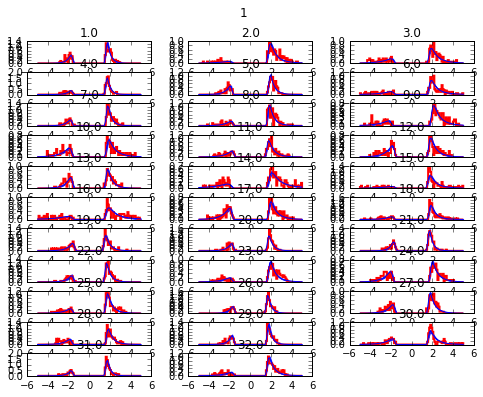

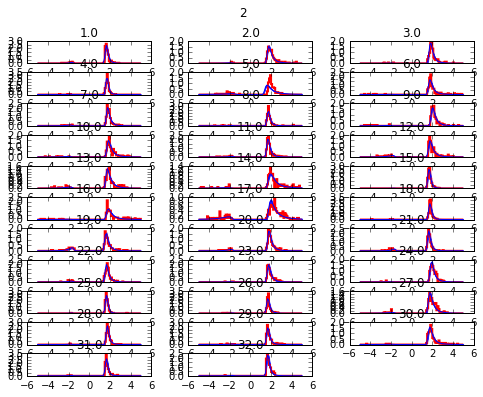

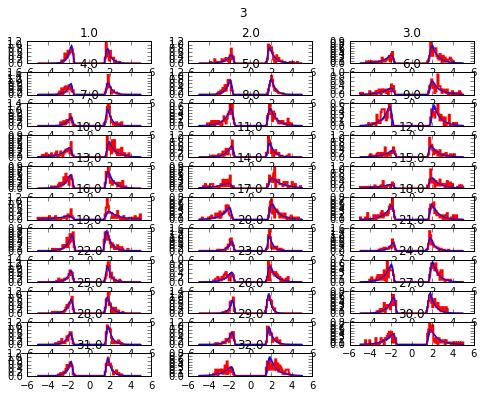

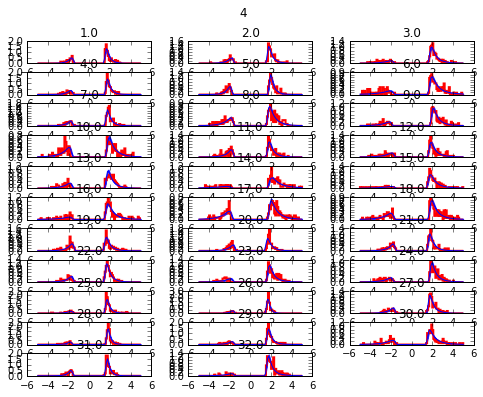

In [22]:
## plot predicted RT distributions for error (left) and correct (right) trials
model.plot_posterior_predictive()